# Getting started

First install the package:

In [1]:
#!pip install pivimage

## Getting sample data
First we need to get some PIV sample data. Sample images can be downloaded using the package `pivtestdata`. You may need to install it first:

In [2]:
# !pip install pivtestdata

In [3]:
import pivtestdata as ptd

In [4]:
pc_1B = ptd.piv_challenge.pc_1B
pc_1B
sample_folder_pc_1B = pc_1B.download()

In [5]:
filenames = sorted(sample_folder_pc_1B.glob('*.tif*'))

## Working with PIV Images

In [6]:
import pivimage

Init a series of image pairs based on the above folder:

In [7]:
pimgs = pivimage.PIVImagePairs(filenames_A=filenames[::2], filenames_B=filenames[1::2])

### Address images

You can address A or B images or both together.

In [8]:
img_pair_3 = pimgs[3]

In [9]:
imgA0 = pimgs[3].A

In [10]:
imgB0 = pimgs[3].B

### Plotting

(<Axes: >, <Axes: >)

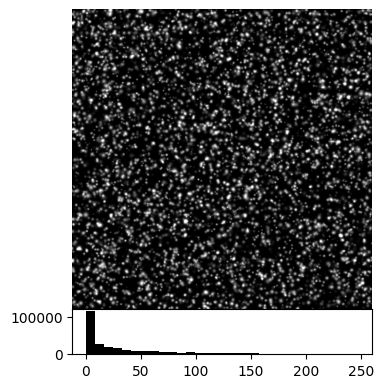

In [11]:
imgA0.plot(bins=30)

Without specifing `A` or `B`, both images are plotted:

(<Axes: >, <Axes: >, <Axes: >, <Axes: >)

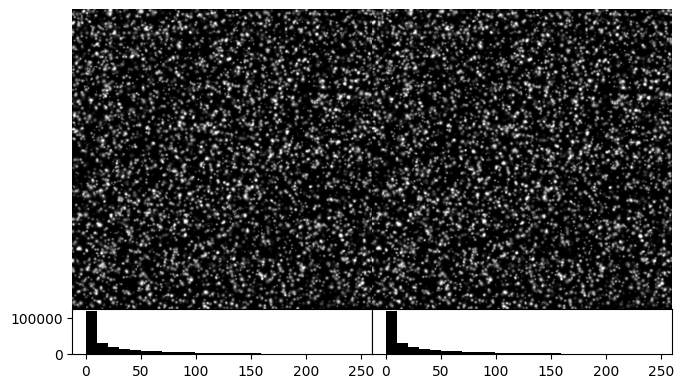

In [12]:
pimgs[3].plot(bins=25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Axes: >

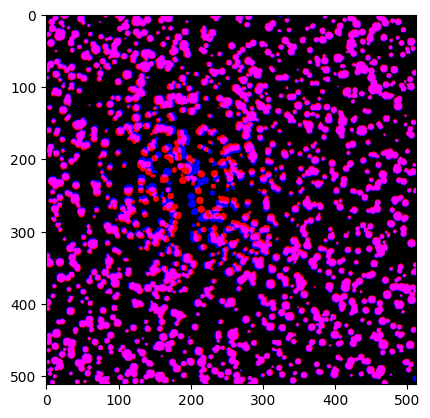

In [13]:
pimgs[-1].plot_overlay()

In [14]:
pimgs[-1]

### Mathematical operations

We can subtract both images:

In [15]:
img_diff = pimgs[-1].B-pimgs[1].A

(<Axes: >, <Axes: >)

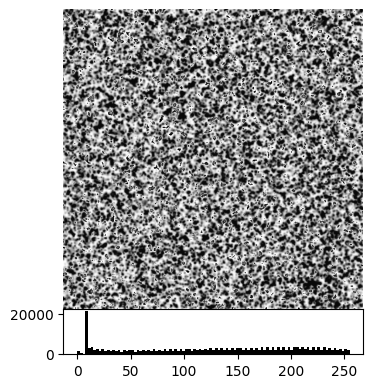

In [16]:
img_diff.plot()

#### Smoothing the image

In [17]:
type(pimgs[-1].A)

pivimage.pivimage.PIVImage

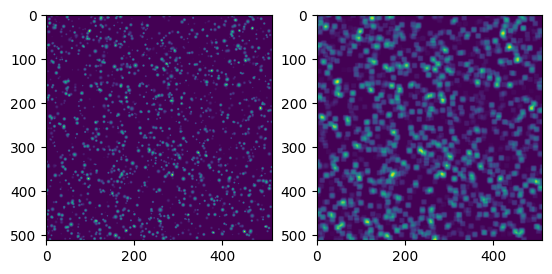

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].imshow(pimgs[-1].A)
axs[1].imshow(pimgs[-1].A.smooth(kernel_size=11))

#### Rotating the image

To illustrate, that it works, we rotate the image and subtract it from the not-rotated one. Compare the above difference, how it looks different. The application is useless, however it shows, that rotating works :-)

(<Axes: >, <Axes: >)

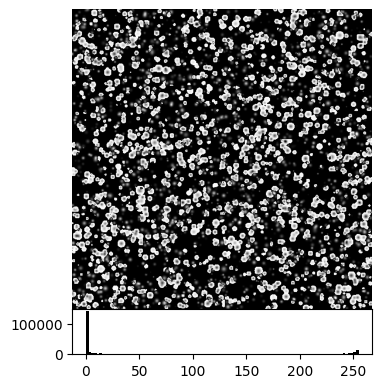

In [19]:
img = pimgs[-1].A
img_diff90 = img - img.rot90()
img_diff90.plot()

#### Normalize images

Normalize an image to range [0, 1]:

1.0

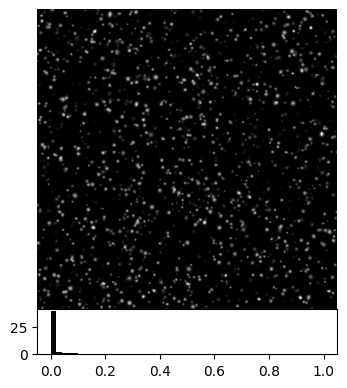

In [20]:
pimgs[-1].A.normalize().plot(density=True, bins=50)
pimgs[-1].A.normalize().max()

#### Apply mask

Replace values, where mask is True with a value

In [21]:
import numpy as np

A = pimgs[0].A
mask = np.zeros_like(A[:], dtype=bool)

mask[0:100, 0:40] = True

In [22]:
masked_pivimg = A.apply_mask(mask, fill_value=0)

(<Axes: >, <Axes: >)

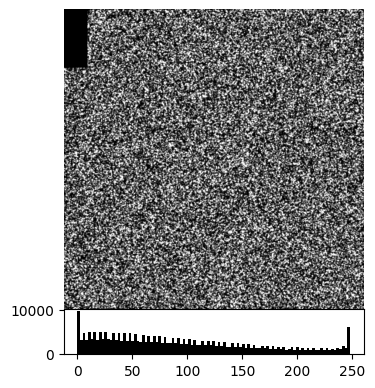

In [23]:
masked_pivimg.plot()